In [1]:
import os
work_dir = os.path.abspath('../../..')
print(work_dir)
os.chdir(work_dir)
from aiphy import Knowledge, MeasureType, Concept, Exp, Intrinsic, Expression
from aiphy.experiment.ground_laboratory import free_fall_config, gravity_config
from aiphy.dataplot import plot_datastruct, plot_data

/home/lixiang/code/ai-physicist


In [2]:
knowledge = Knowledge.default()
knowledge.register_expstruct('gravity', gravity_config())
vx = knowledge.register_expr(f"(1->Particle) |- D[posx[1]]/D[t[0]]")
vy = knowledge.register_expr(f"(1->Particle) |- D[posy[1]]/D[t[0]]")
vz = knowledge.register_expr(f"(1->Particle) |- D[posz[1]]/D[t[0]]")
ax = knowledge.register_expr(f"(1->Particle) |- D[{vx}[1]]/D[t[0]]")
ay = knowledge.register_expr(f"(1->Particle) |- D[{vy}[1]]/D[t[0]]")
az = knowledge.register_expr(f"(1->Particle) |- D[{vz}[1]]/D[t[0]]")
freel = knowledge.register_expr(
    Expression("[#stringmotion0 (1->Spring) |- length[1]]"))
mass = knowledge.register_expr(
    Expression(f"[#gravity (1->Particle) |- length[2] - {freel}[2]]"))

knowledge.register_expstruct('free_fall', free_fall_config())
g = knowledge.register_expr(
    Expression(f"[#free_fall |- {az}[1]]"))
k = knowledge.register_expr(f"[#oscillation (2->Spring) |- (-{mass}[1] * {ax}[1] / (length[2] - {freel}[2]))]")


T = knowledge.register_expr(
    Expression("(1 -> Particle) |- (D[posx[1]]/D[t[0]] ** 2 + D[posy[1]]/D[t[0]] ** 2 + D[posz[1]]/D[t[0]] ** 2)/2"))
sumT = knowledge.register_expr(
    Expression(f"[Sum:Particle] (1->Particle) |- {mass}[1] * {T}[1]"))
sumV = knowledge.register_expr(
    Expression(f"[Sum:Particle] (1->Particle) (2->Particle) |- {mass}[1]*{mass}[2]/(dist[1, 2]+dist[2, 1])"))
sumVg = knowledge.register_expr(
    Expression(f"[Sum:Particle] (1->Particle) |- {mass}[1]*{g}*posz[1]"))
sumVk = knowledge.register_expr(
    Expression(f"[Sum:Spring] (1->Spring) |- {k}[1] * (length[1] - {freel}[1])**2 / 2"))

In [3]:
from aiphy.experiment.ground_laboratory import projectile_oscillation_1_config, projectile_oscillation_2_config
from aiphy.experiment.ground_laboratory import pulley_1_config, pulley_2_config, pulley_3_config
from aiphy.experiment.ground_laboratory import pulley_oscillation_1_config, pulley_oscillation_2_config
from aiphy.experiment.ground_laboratory import masspulley_oscillation_1_config, masspulley_oscillation_2_config

In [10]:
main_exp = masspulley_oscillation_2_config()
knowledge.register_expstruct('masspulley_oscillation_2', main_exp)

Unexpected exception formatting exception. Falling back to standard exception


thread '<unnamed>' panicked at src/experiments/topy.rs:355:35:
called `Option::unwrap()` on a `None` value
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace
Traceback (most recent call last):
  File "/opt/miniconda/envs/pubpy/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2187230/644102373.py", line 1, in <module>
    main_exp = masspulley_oscillation_2_config()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lixiang/code/ai-physicist/aiphy/experiment/ground_laboratory/masspulley_oscillation_2.py", line 128, in masspulley_oscillation_2_config
    expconfig.register_geometry_info(Proposition.IsConserved(expconfig.gen_exp(
                                                             ^^^^^^^^^^^^^^^^^^
pyo3_runtime.PanicException: called `Option::unwrap()` on a `None` value

During handling of the above exception, another exception

In [8]:
main_exp.random_settings()
Tv = knowledge.eval(sumT, main_exp)
Vgv = knowledge.eval(sumVg, main_exp)
Vkv = knowledge.eval(sumVk, main_exp)

In [9]:
Eallv = knowledge.eval(f"{sumT} - {sumVg} + {sumVk}", main_exp)
Eallv

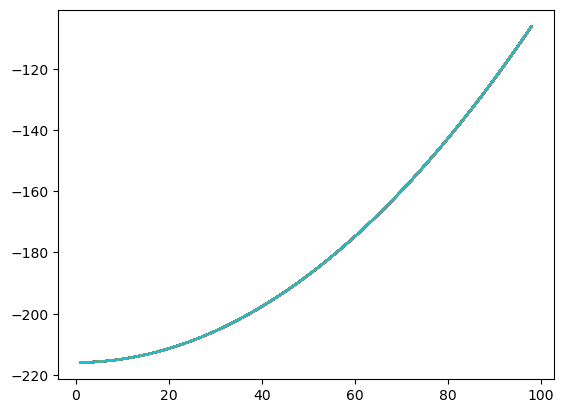

In [16]:
plot_data(Eallv)

In [3]:
from aiphy.experiment.ground_laboratory import slope_oscillation_1_config

In [4]:
main_exp = slope_oscillation_1_config()
knowledge.register_expstruct('slope_oscillation_1', main_exp)
main_exp.random_settings()
Tv = knowledge.eval(sumT, main_exp)
Vgv = knowledge.eval(sumVg, main_exp)
Vkv = knowledge.eval(sumVk, main_exp)

In [5]:
Eallv = knowledge.eval(f"{sumT} - {sumVg} + {sumVk}", main_exp)